In [1]:
import pandas as pd 
import datetime as dt 
import matplotlib.pyplot as plt

In [2]:
timestamps = [
    dt.datetime(2024,5,24,11,45,1),
    dt.datetime(2024,5,27,11),
    dt.datetime(2024,5,28,13),
    dt.datetime(2024,5,31,11,30),
    dt.datetime(2024,6,3,11),
    dt.datetime(2024,6,4,11),
    dt.datetime(2024,6,5,11)
]

directions = ['buy','buy','buy','buy','sell','sell','buy']

prices_open = [
    199.456, 199.451, 200.507, 199.931, 199.781, 198.757, 199.448
]

prices_close = [
    199.935, 200.341, 200.582, 200.164, 199.628, 197.982, 199.467
]

In [3]:
common_res = 0
results = []
for o,c,d in zip(prices_open, prices_close, directions):
    res = c - o if d == 'buy' else o - c
    results.append(res)
    print(f'{d}: {o} --> {c} result: {res:.3f}')
    common_res += round(res,3)
    

buy: 199.456 --> 199.935 result: 0.479
buy: 199.451 --> 200.341 result: 0.890
buy: 200.507 --> 200.582 result: 0.075
buy: 199.931 --> 200.164 result: 0.233
sell: 199.781 --> 199.628 result: 0.153
sell: 198.757 --> 197.982 result: 0.775
buy: 199.448 --> 199.467 result: 0.019


In [4]:
common_res

2.624

In [5]:
k = 155
volume = 0.01

profit = round(100*volume*(1000*common_res/k),2)
profit

16.93

In [6]:
history = pd.DataFrame({"date":timestamps,"open":prices_open,
                        "close":prices_close,"direction":directions,"result":results}).set_index('date')
history 

,open,close,direction,result
date,,,,
2024-05-24 11:45:01,199.456,199.935,buy,0.479
2024-05-27 11:00:00,199.451,200.341,buy,0.890
2024-05-28 13:00:00,200.507,200.582,buy,0.075
2024-05-31 11:30:00,199.931,200.164,buy,0.233
2024-06-03 11:00:00,199.781,199.628,sell,0.153
2024-06-04 11:00:00,198.757,197.982,sell,0.775
2024-06-05 11:00:00,199.448,199.467,buy,0.019


In [7]:
history['cumulative result'] = (history.result.cumsum()*1000).astype(int)
history

,open,close,direction,result,cumulative result
date,,,,,
2024-05-24 11:45:01,199.456,199.935,buy,0.479,479
2024-05-27 11:00:00,199.451,200.341,buy,0.890,1369
2024-05-28 13:00:00,200.507,200.582,buy,0.075,1444
2024-05-31 11:30:00,199.931,200.164,buy,0.233,1676
2024-06-03 11:00:00,199.781,199.628,sell,0.153,1830
2024-06-04 11:00:00,198.757,197.982,sell,0.775,2605
2024-06-05 11:00:00,199.448,199.467,buy,0.019,2624


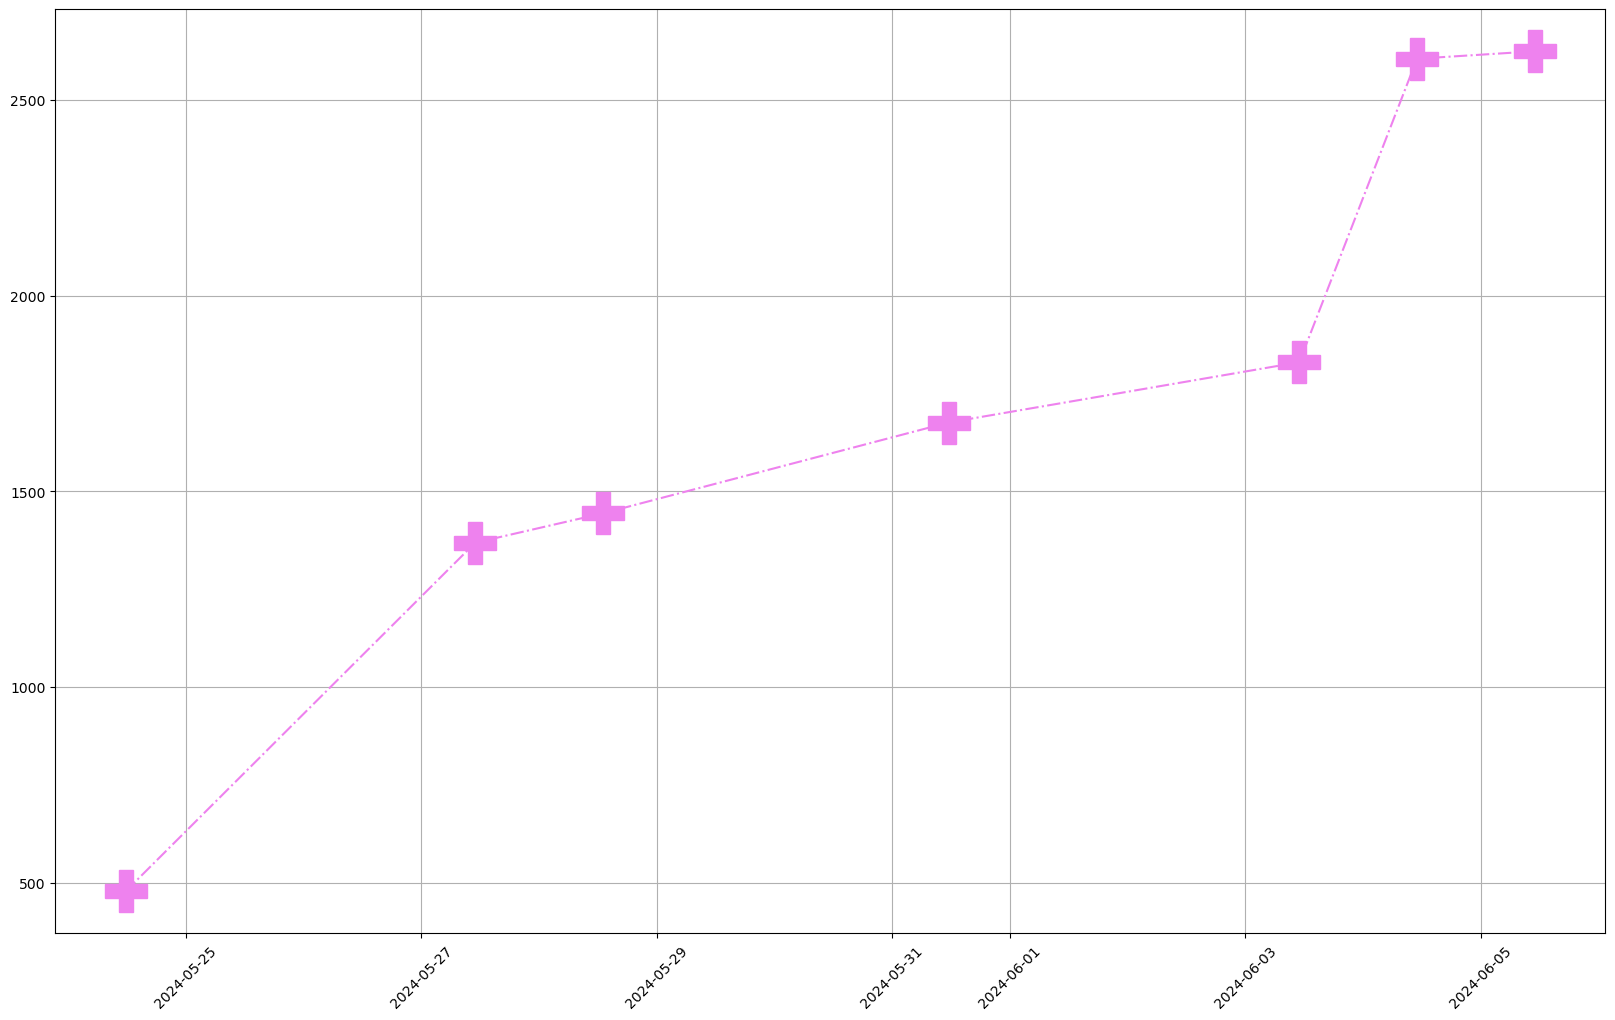

In [8]:
plt.figure(figsize=(20,12))
plt.plot(history.index,history['cumulative result'],marker = 'P',markersize=30, color ='violet', linestyle = '-.')
plt.xticks(rotation=45)
plt.grid()
plt.show()

In [9]:
for lot_size in (0.01,0.02,0.05,0.25,0.4):
    history[f'lot {lot_size}'] = round(100*lot_size*(history['cumulative result']/k),2)

history 

,open,close,direction,result,cumulative result,lot 0.01,lot 0.02,lot 0.05,lot 0.25,lot 0.4
date,,,,,,,,,,
2024-05-24 11:45:01,199.456,199.935,buy,0.479,479,3.09,6.18,15.45,77.26,123.61
2024-05-27 11:00:00,199.451,200.341,buy,0.890,1369,8.83,17.66,44.16,220.81,353.29
2024-05-28 13:00:00,200.507,200.582,buy,0.075,1444,9.32,18.63,46.58,232.90,372.65
2024-05-31 11:30:00,199.931,200.164,buy,0.233,1676,10.81,21.63,54.06,270.32,432.52
2024-06-03 11:00:00,199.781,199.628,sell,0.153,1830,11.81,23.61,59.03,295.16,472.26
2024-06-04 11:00:00,198.757,197.982,sell,0.775,2605,16.81,33.61,84.03,420.16,672.26
2024-06-05 11:00:00,199.448,199.467,buy,0.019,2624,16.93,33.86,84.65,423.23,677.16
